**Experiment - 3**

***Objective:***

To find the best regression model for the provided data set. Performance metric is RMSE.

***Instructions:***

*Data Set:* One training set and one test set are attached to this email.

*Analysis:* Use any regression analysis tools or methods to derive the best-fit plot. The goal is not just to fit the training data well but to ensure that the model generalizes well to the test data.

# **Reading and Plotting the Train Dataset**

In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import math

In [2]:
#Reading the train dataset
df = pd.read_csv("Set2_Train_Batch_modified_500 (1).csv")
#x_train,y_train = df['x'],df['y']
print(df.ndim, df.shape)
df.head()

2 (400, 2)


,x,y
0,7.320844,233.160771
1,9.987887,375.107244
2,13.050182,621.492315
3,0.830615,63.487180
4,0.852721,54.022072


In [3]:
#Reading the test dataset
df_test = pd.read_csv("Set2_Test_Batch_modified_500 (1).csv")
#x_test,y_test = df_test['x'],df_test['y']
df_test.head()

,x,y
0,13.559759,680.320884
1,9.072683,313.425357
2,3.600304,51.036576
3,12.720123,531.102539
4,3.731297,31.689404


In [4]:
#Reshaping to fit into the LinearRegression() method
#print(df['x'].ndim, df['x'].shape, df['y'].ndim, df['y'].shape)

x_train = np.array(df['x']).reshape(-1,1)
y_train = np.array(df['y']).reshape(-1,1)

x_test = np.array(df_test['x']).reshape(-1,1)
y_test = np.array(df_test['y']).reshape(-1,1)

#x_train.ndim, x_train.shape, y_train.ndim, y_train.shape

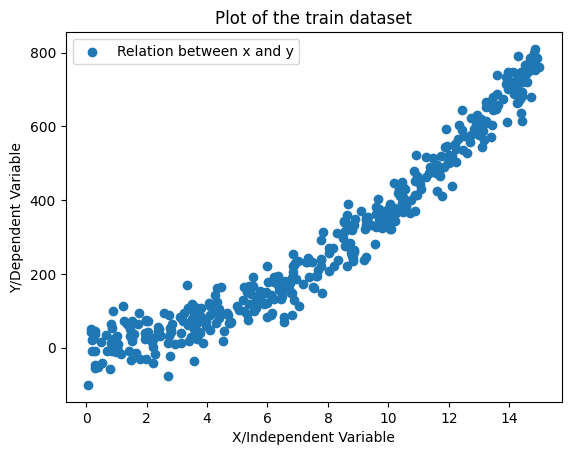

In [5]:
#Visualizing the train dataset
plt.scatter(x='x',y='y',data=df)
plt.title("Plot of the train dataset")
plt.ylabel("Y/Dependent Variable")
plt.xlabel("X/Independent Variable")
plt.legend(["Relation between x and y"])
plt.show()

***Student's Note -*** From the above plot it is clear that a simple linear regression solution for the given problem statement would not be a perfect fit. A bent curve with the help of polynomial regression would give accurate results.

The above mentioned intutuion is also checked with the regression score and rmse metric below.

# **Linear Regression Close Fit Solution Model**

In [6]:
#Fitting the train data into the regression model

regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [7]:
#Accessing the coefficent and intercept
theta_0 = regr.intercept_
theta_1 = regr.coef_

print(f"The line is of the form: \ny = {theta_0} + {theta_1}*x")

The line is of the form: 
y = [-117.50507047] + [[53.08335463]]*x


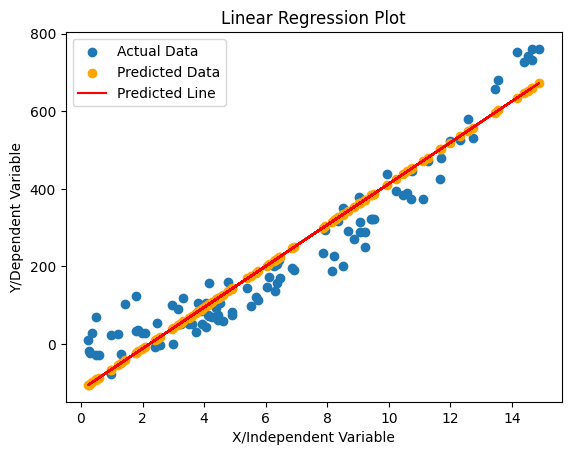

In [8]:
#Plotting the results
y_pred = regr.predict(x_test)
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred,color="orange")
plt.plot(x_test,y_pred,color="red")
plt.title("Linear Regression Plot")
plt.ylabel("Y/Dependent Variable")
plt.xlabel("X/Independent Variable")
plt.legend(["Actual Data", "Predicted Data","Predicted Line"])
plt.show()

In [9]:
#Performance Metrics
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Square Error: {rmse}")

print(f"The regression score is: {regr.score(x_test,y_test)}")

Root Mean Square Error: 64.88405221594972
The regression score is: 0.905930601898437


# **Polynomial Regression -** *Degree 2*

In [10]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)
print(X_poly_train.shape, X_poly_test.shape)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train,y_train)

(400, 3) (100, 3)


LinearRegression()

In [11]:
#Accessing the coefficent and intercept
theta_0 = poly_reg.intercept_
theta_1 = poly_reg.coef_
print(theta_1)
print(f"The line is of the form: \ny = {theta_0[0]} + {theta_1[0][1]}*x + {theta_1[0][2]}*x^2")

[[0.         5.01391068 3.1415044 ]]
The line is of the form: 
y = 5.203852947132077 + 5.013910679126321*x + 3.1415044047693064*x^2


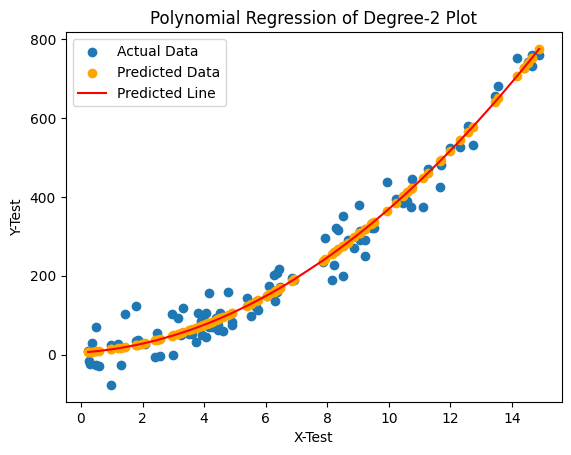

In [12]:
#Plotting the results
y_pred_poly = poly_reg.predict(X_poly_test)
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_poly,color="orange")

#Sorting the values of x before line plot
df_for_sort = pd.DataFrame({'x_test':x_test.flatten(), 'y_test':y_test.flatten(), 'y_pred_poly':y_pred_poly.flatten()})
sorted_df = df_for_sort.sort_values(by="x_test")
plt.plot('x_test','y_pred_poly',data=sorted_df,color="red")
#print(sorted_df.head())
#sorted_df.to_csv('file1.csv')

plt.title("Polynomial Regression of Degree-2 Plot")
plt.ylabel("Y-Test")
plt.xlabel("X-Test")
plt.legend(["Actual Data", "Predicted Data","Predicted Line"])
plt.show()

In [13]:
#Performance Metrics
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_poly)
rmse = math.sqrt(mse)
print(f"Root Mean Square Error: {rmse}")

print(f"The regression score is: {regr.score(x_test,y_pred_poly)}")

Root Mean Square Error: 37.65046380301478
The regression score is: 0.9353196904126065


# **Polynomial Regression -** *Degree N*

Theta0/intercept for 2th degree polynomial is [5.20385295]
Theta/coefficients for 2th degree polynomial are [[5.01391068 3.1415044 ]]

Theta0/intercept for 3th degree polynomial is [8.71157121]
Theta/coefficients for 3th degree polynomial are [[ 2.27287704  3.5911422  -0.01969817]]

Theta0/intercept for 4th degree polynomial is [-1.84583008]
Theta/coefficients for 4th degree polynomial are [[ 1.60159059e+01 -5.03309955e-01  4.03107174e-01 -1.40353367e-02]]

Theta0/intercept for 5th degree polynomial is [-5.97554483]
Theta/coefficients for 5th degree polynomial are [[ 2.39963841e+01 -4.18508529e+00  1.05356809e+00 -6.26310910e-02
   1.29246182e-03]]



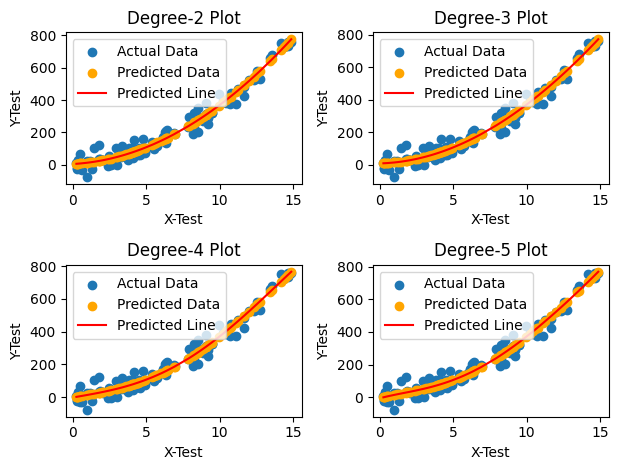

In [14]:
rmse_dict = {}
reg_dict = {}
for i in range(2,6):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  X_poly_train = poly.fit_transform(x_train)
  X_poly_test = poly.fit_transform(x_test)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train,y_train)
  theta_0 = poly_reg.intercept_
  theta_1 = poly_reg.coef_
  print(f"Theta0/intercept for {i}th degree polynomial is {theta_0}")
  print(f"Theta/coefficients for {i}th degree polynomial are {theta_1}\n")
  y_pred_poly = poly_reg.predict(X_poly_test)
  plt.subplot(2,2,i-1)
  plt.tight_layout()
  plt.scatter(x_test,y_test)
  plt.scatter(x_test,y_pred_poly,color="orange")
  df_for_sort = pd.DataFrame({'x_test':x_test.flatten(), 'y_test':y_test.flatten(), 'y_pred_poly':y_pred_poly.flatten()})
  sorted_df = df_for_sort.sort_values(by="x_test")
  plt.plot('x_test','y_pred_poly',data=sorted_df,color="red")
  plt.title(f"Degree-{i} Plot")
  plt.ylabel("Y-Test")
  plt.xlabel("X-Test")
  plt.legend(["Actual Data", "Predicted Data","Predicted Line"])
  mse = mean_squared_error(y_true=y_test,y_pred=y_pred_poly)
  rmse = math.sqrt(mse)
  rmse_dict[i] = rmse
  reg_dict[i] = regr.score(x_test,y_pred_poly)
#print(f"The line is of the form: \ny = {theta_0[0]} + {theta_1[0][1]}*x + {theta_1[0][2]}*x^2")

***Student's Note -*** Including the bias in polynomial featues did not give any changes in the coefficient values.

In [15]:
#Performance Metrics
for key in rmse_dict.keys():
  print(f"For {key}th degree polynomial, the RMSE error is {rmse_dict[key]}")

print("\n")

for key in reg_dict.keys():
  print(f"For {key}th degree polynomial, the regression score is {reg_dict[key]}")

For 2th degree polynomial, the RMSE error is 37.65046380301478
For 3th degree polynomial, the RMSE error is 37.83065405535904
For 4th degree polynomial, the RMSE error is 37.91676246484955
For 5th degree polynomial, the RMSE error is 37.93254144424554


For 2th degree polynomial, the regression score is 0.9353196904126064
For 3th degree polynomial, the regression score is 0.9347304684955633
For 4th degree polynomial, the regression score is 0.934979776890261
For 5th degree polynomial, the regression score is 0.9350393376424283


***Student's Note -*** Therefore, it can be concluded that higher the degree of polynomial, slightly more is the error and hence less accurate is model for the given dataset. Degree 2 polynomial is the perfect fit for the data.